In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import wlcstat.wlc_copoly as wlc_copoly
import wlcstat.wlcstruc as wlcstruc

import sys
sys.path.append("./Vertex/subroutines")
from GAMcalc import *  # Code for calculating vertex functions
import propagator  # propagator object used to store pre-calculated values
import wignerD as wd # wigner D object used to store pre-calculated values

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

pset=propagator.prop_set(nlam=10) 
wigset = wd.wigner_d_vals()

# import binder_diblock_gamma234_vertex as bd
import homo_mike as hm

In [2]:
# import gaus_vertex_pd_mix as gv

In [17]:
ID = 10001.04006

looping = "full mark dens comp alt f_bind,"

settings = np.load(r"C:\Users\tmhab\wlcsim_membrane\binder_diblock\ID=%s_settings.npy" % (ID), allow_pickle = True)

[chrom, [klog_min, klog_max, klog_num]] = settings

[n_bind, v_int, Vol_int, e_m, rho_c, rho_s, poly_marks, M, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom

[pa_vec, marks_2] = poly_marks

mu1_array = np.arange(mu_min, mu_max, del_mu)
mu2_array = np.arange(mu_min, mu_max, del_mu)

k_vec = np.logspace(klog_min-1, klog_max, klog_num) / b
nk = klog_num

# s2_mats = np.load(r"C:\Users\tmhab\wlcsim_membrane\binder_diblock\ID=%s_chrom_s2_mats_v_int=[[%s,%s],[%s,%s]],diblock,mu_max=%s.npy"\
#                  % (ID, v_int[0,0], v_int[0,1], v_int[1,0], v_int[1,1], mu_max), allow_pickle = True)

s_bind_A_arr = np.load(r"ID=%s_s_bind_A.npy" % ID, allow_pickle=True)
s_bind_B_arr = np.load(r"ID=%s_s_bind_B.npy" % ID, allow_pickle=True)

spacing = int(1 / del_mu)

In [19]:
klog_min

-2.5

In [21]:

# wavevectors
k0 = k_vec[0]
kf = k_vec[-1]
# nk = 50
# k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

k1_vec = np.zeros((nk, 3))
k2_vec = np.zeros((nk, 3))
k3_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

theta_1 = 2*np.pi/3 #2* np.pi * 1 / 3
theta_2 = 2*np.pi/3

frac = 1
k2_vec[:, 0] += frac * np.cos(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)
k2_vec[:, 1] += frac * np.sin(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)

k3_vec[:, 0] += frac * np.cos(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)
k3_vec[:, 1] += frac * np.sin(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)


k4_vec = - (k1_vec + k2_vec + k3_vec)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

# homopolymers

In [162]:
i = 7
j = 7

mu1 = mu1_array[i]
mu2 = mu2_array[j]

FA = 1#0.5

In [164]:
mu1

-1.5

In [166]:
# heterogenous binding
# s_bnd_A = s_bind_A_arr[i,j,:]
# s_bnd_B = s_bind_B_arr[i,j,:]
s_bnd_A = np.ones(len(s_bind_A_arr[i,j,:]))
s_bnd_B = np.ones(len(s_bind_A_arr[i,j,:]))

cc_red = bd.eval_and_reduce_cc(M)

s_cgam0_red = bd.eval_and_reduce_cgam(s_bnd_A)

s_cgam1_red = bd.eval_and_reduce_cgam(s_bnd_B)

sisj_AA_red = bd.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_A, s_bnd_A)

sisj_AB_red = bd.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_A, s_bnd_B)

sisj_BA_red = sisj_AB_red

sisj_BB_red = bd.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_B, s_bnd_B)

M2s = [sisj_AA_red,sisj_AB_red,sisj_BA_red,sisj_BB_red, s_cgam0_red, s_cgam1_red, cc_red]
s2_binder = bd.calc_sf2_chromo_shlk(chrom, M2s, k_vec)

In [167]:
s2_binder[0]

array([2.43197853e+09, 2.41415895e+09, 2.39182914e+09, 2.36394068e+09,
       2.32925586e+09, 2.28634581e+09, 2.23361085e+09, 2.16933673e+09,
       2.09180365e+09, 1.99946591e+09, 1.89121455e+09, 1.76671924e+09,
       1.62681230e+09, 1.47382889e+09, 1.31176425e+09, 1.14608809e+09,
       9.83116273e+08, 8.29012222e+08, 6.88717460e+08, 5.65228995e+08,
       4.59495246e+08, 3.70855041e+08, 2.97687061e+08, 2.37967169e+08,
       1.89625689e+08, 1.50735810e+08, 1.19595353e+08, 9.47488021e+07,
       7.49782715e+07, 5.92800000e+07])

In [168]:
# FA = 0.5

In [169]:
# quinn shifan vertex
s2_vert = np.zeros(klog_num)
for i in range(klog_num):
    Ks = k_vec[i]
    s2_vert[i] = s2wlc(pset, N, FA, Ks, sequence=[0,0])

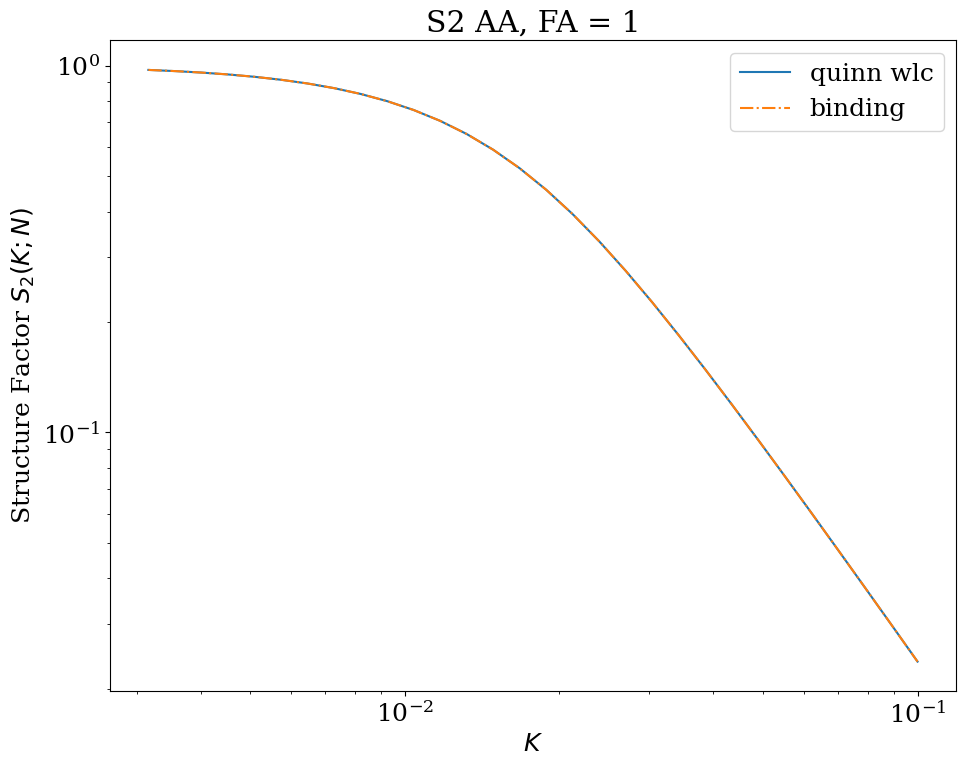

In [174]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
plt.plot(k_vec, s2_vert/N**2, label = "quinn wlc", linestyle = "-")
plt.plot(k_vec, s2_binder[0]/N**2, label = "binding", linestyle = "-.")

plt.xscale('log')
plt.yscale('log')

plt.title("S2 AA, FA = %s" % (FA, ) )
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()

In [177]:
%%time
#VERTEX
s3_arr_vert = np.zeros(nk)
for i in range(nk):
    Ks = k1_vec[i], k2_vec[i], -k1_vec[i] - k2_vec[i]
    s3_arr_vert[i] = s3wlc(pset, N, FA, Ks, sequence=[0,0,0])

CPU times: total: 3.89 s
Wall time: 13.6 s


In [178]:
# bd.calc_sf3(chrom, M3, [k1_vec[0]], [k2_vec[0]])

array([[[1.19919499e+14, 1.19919499e+14, 1.19919499e+14],
        [1.19919499e+14, 1.19919499e+14, 1.19919499e+14],
        [1.19919499e+14, 1.19919499e+14, 1.19919499e+14]],

       [[1.19919499e+14, 1.19919499e+14, 1.19919499e+14],
        [1.19919499e+14, 1.19919499e+14, 1.19919499e+14],
        [1.19919499e+14, 1.19919499e+14, 1.19919499e+14]],

       [[1.19919499e+14, 1.19919499e+14, 1.19919499e+14],
        [1.19919499e+14, 1.19919499e+14, 1.19919499e+14],
        [1.19919499e+14, 1.19919499e+14, 1.19919499e+14]]])

In [179]:
M3 = bd.calc_mon_mat_3(s_bnd_A, s_bnd_B)

s3_arr_gaus = np.zeros(nk)
for i in range(nk):
    s3_arr_gaus[i] = bd.calc_sf3(chrom, M3, [k1_vec[i]], [k2_vec[i]])[0,0,0]

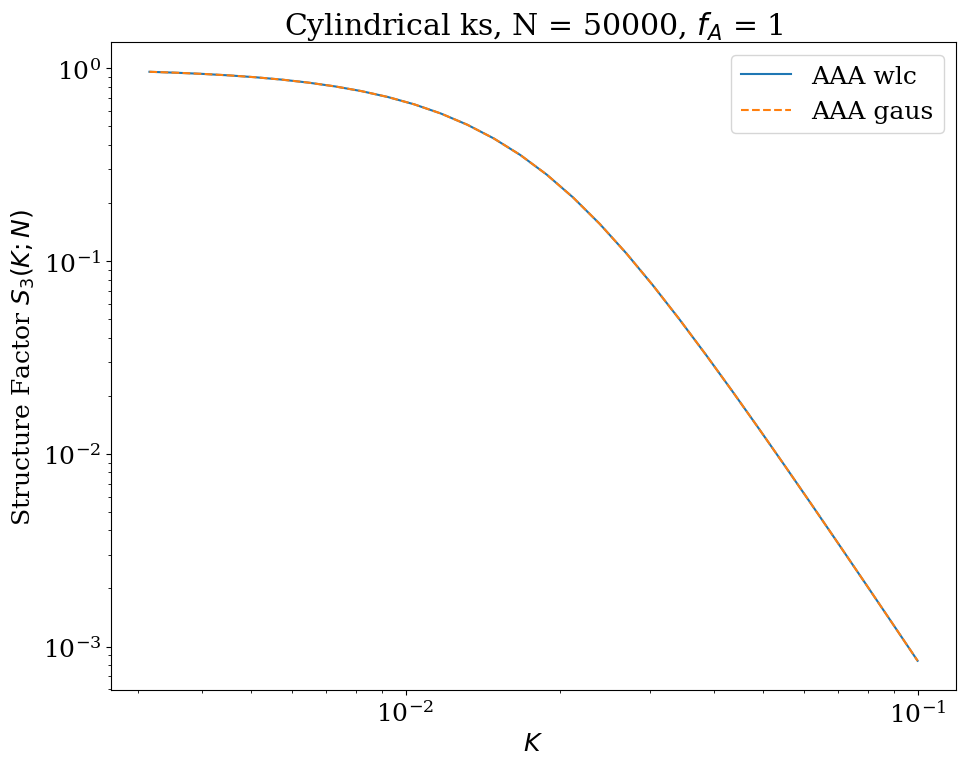

In [190]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


plt.plot(k_vec[:], s3_arr_vert[:]/N**3, label = "AAA wlc", linestyle = "-")

plt.plot(k_vec[:], s3_arr_gaus/N**3, label = "AAA gaus", linestyle = "--")




plt.xscale('log')
plt.yscale('log')

plt.title("Cylindrical ks, N = " + str(N) + ", $f_A$ = " + str(FA))
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{3}(K;N)$')
# plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()

In [206]:
small_nk = 10

In [208]:
%%time

M4 = bd.calc_mon_mat_4(s_bnd_A, s_bnd_B)

s4_arr_gaus = np.zeros(small_nk)
for i in range(small_nk):
    s4_arr_gaus[i] = bd.calc_sf4(chrom, M4, [k1_vec[i]], [k2_vec[i]], [k3_vec[i]])[0,0,0,0]

CPU times: total: 1min 30s
Wall time: 4min 12s


In [209]:
%%time
#VERTEX. unstable!

s4_arr_vert_AAAA = np.zeros(small_nk)

for i in range(small_nk):
    Ks = k1_vec[i], k2_vec[i], k3_vec[i], k4_vec[i]
    s4_arr_vert_AAAA[i] = s4wlc(pset, wigset, N, FA, Ks, sequence=[0,0,0,0])

CPU times: total: 22.6 s
Wall time: 58 s


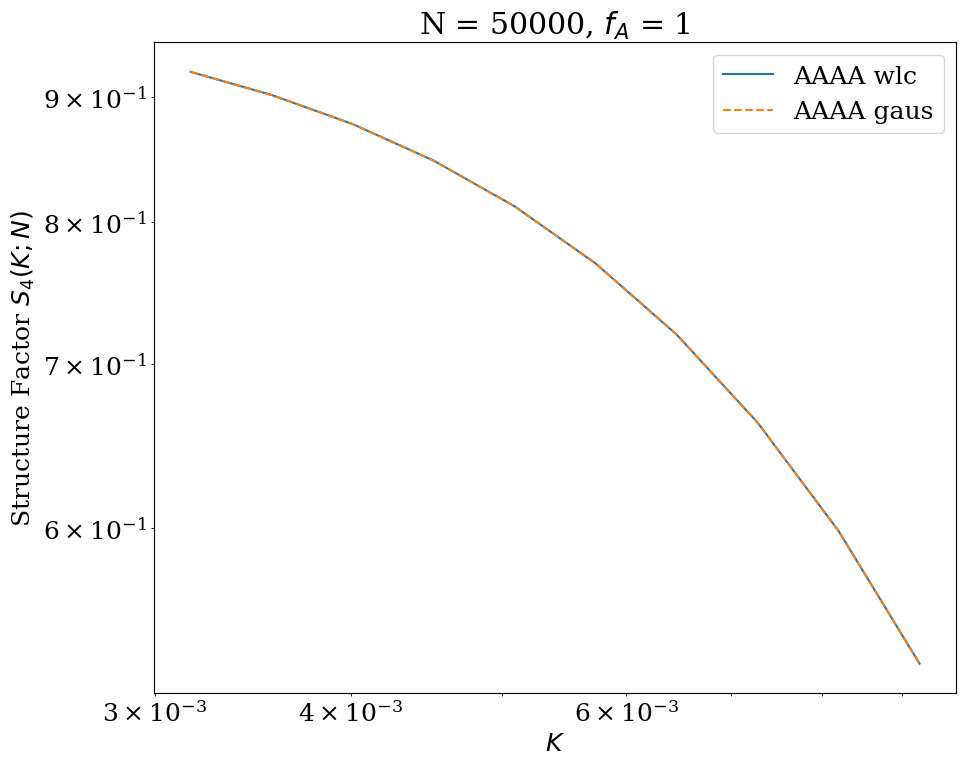

In [216]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s4_arr_vert_AAAA, label = "AAAA wlc", linestyle = "-")

# plt.plot(k_vec, s4_gaus, label = "AAAA gaus", linestyle = "--")


plt.plot(k_vec[:small_nk], s4_arr_vert_AAAA[:]/N**4, label = "AAAA wlc", linestyle = "-")

plt.plot(k_vec[:small_nk], s4_arr_gaus/N**4, label = "AAAA gaus", linestyle = "--")

plt.xscale('log')
plt.yscale('log')

plt.title("N = " + str(N) + ", $f_A$ = " + str(FA))
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{4}(K;N)$')
# plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()

# diblocks

In [23]:
i = 7
j = 7

mu1 = mu1_array[i]
mu2 = mu2_array[j]

FA = 0.5

In [25]:
# heterogenous binding
s_bnd_A = s_bind_A_arr[i,j,:]
s_bnd_B = s_bind_B_arr[i,j,:]
# s_bnd_A = np.ones(len(s_bind_A_arr[i,j,:]))
# s_bnd_B = np.ones(len(s_bind_A_arr[i,j,:]))

cc_red = bd.eval_and_reduce_cc(M)

s_cgam0_red = bd.eval_and_reduce_cgam(s_bnd_A)

s_cgam1_red = bd.eval_and_reduce_cgam(s_bnd_B)

sisj_AA_red = bd.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_A, s_bnd_A)

sisj_AB_red = bd.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_A, s_bnd_B)

sisj_BA_red = sisj_AB_red

sisj_BB_red = bd.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_B, s_bnd_B)

M2s = [sisj_AA_red,sisj_AB_red,sisj_BA_red,sisj_BB_red, s_cgam0_red, s_cgam1_red, cc_red]
s2_binder = bd.calc_sf2_chromo_shlk(chrom, M2s, k_vec)

In [27]:
s_bnd_A

array([9.17390852e-01, 9.91109010e-01, 9.97413441e-01, 9.98006982e-01,
       9.98050520e-01, 9.98022520e-01, 9.97974191e-01, 9.97903878e-01,
       9.97788914e-01, 9.97576292e-01, 9.97157533e-01, 9.96326856e-01,
       9.94720527e-01, 9.91739959e-01, 9.86470420e-01, 9.77619607e-01,
       9.63511731e-01, 9.42176663e-01, 9.11562731e-01, 8.69872475e-01,
       8.15976899e-01, 7.49819067e-01, 6.72691652e-01, 5.87282681e-01,
       4.97434650e-01, 4.07641954e-01, 3.22392659e-01, 2.45511469e-01,
       1.79660415e-01, 1.26102532e-01, 8.47523938e-02, 5.44576319e-02,
       3.34049437e-02, 1.95349295e-02, 1.08768326e-02, 5.75932523e-03,
       2.89732552e-03, 1.38404672e-03, 6.28138628e-04, 2.71663191e-04,
       1.13005145e-04, 4.63330825e-05, 1.98666715e-05, 1.00810479e-05,
       7.36414347e-06, 9.26310659e-06, 1.96133948e-05, 5.66928924e-05,
       1.83845092e-04, 5.34796997e-04])

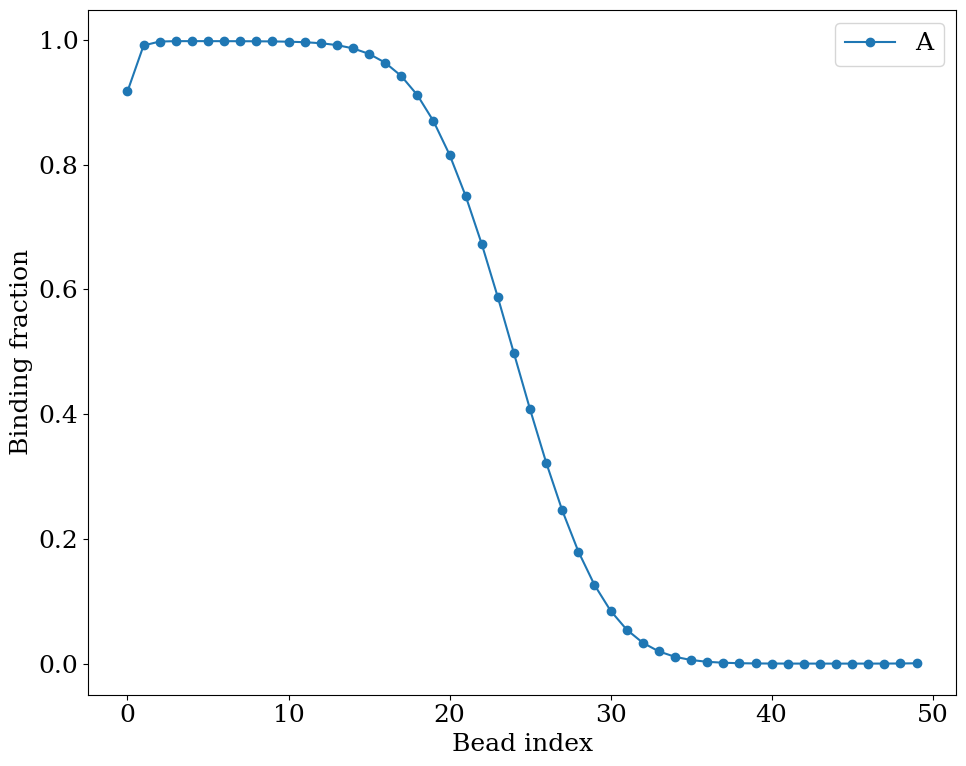

In [29]:
# pa_vec = np.zeros((nm)) + 1
# f_ref = np.min(np.array([j_aa, j_bb, j_ab, ea / 2, eb / 2]))

# phia, phib = eval_phi(pa_vec, mu_a, mu_b, ea, eb, j_aa, j_bb, j_ab, f_ref)

# ea_chk = ea
# eb_chk = 0
# q_chk = 1 + np.exp(mu_a - ea_chk) + np.exp(mu_b - eb_chk)
# phia_chk = np.exp(mu_a - ea_chk) / q_chk
# phib_chk = np.exp(mu_b - eb_chk) / q_chk

plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(s_bnd_A,'o-', label = "A")
# plt.plot(phib,'o-')
# plt.plot(np.array([0, nm - 1]), np.array([phia_chk, phia_chk]),'--')
# plt.plot(np.array([0, nm - 1]), np.array([phib_chk, phib_chk]),'--')
# plt.plot(pa_vec,'.-')

plt.xlabel(r'Bead index')
plt.ylabel(r'Binding fraction')
plt.tight_layout()
plt.legend()
plt.show()

# plt.plot(s_bnd_A)

In [31]:
s2_vert = np.zeros(nk)
s2_vert_AB = np.zeros(nk)
s2_vert_BB = np.zeros(nk)

for i in range(nk):
    Ks = k_vec[i]
    s2_vert[i] = s2wlc(pset, N, FA, Ks, sequence=[0,0])
    s2_vert_AB[i] = s2wlc(pset, N, FA, Ks, sequence=[0,1])
    s2_vert_BB[i] = s2wlc(pset, N, FA, Ks, sequence=[1,1])

In [32]:
# s2_binder

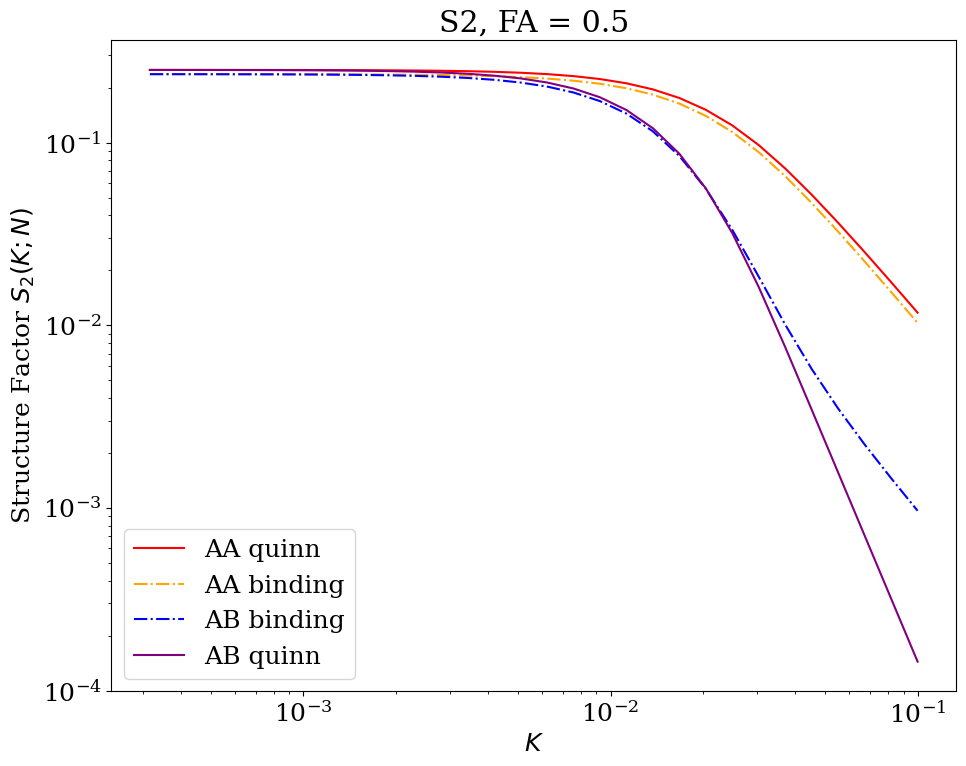

In [33]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
plt.plot(k_vec, s2_vert/N**2, label = "AA quinn", linestyle = "-", color = "red")
plt.plot(k_vec, s2_binder[0]/N**2, label = "AA binding", linestyle = "-.", color = "orange")


plt.plot(k_vec, s2_binder[1]/N**2, label = "AB binding", linestyle = "-.", color = "blue")
plt.plot(k_vec, s2_vert_AB/N**2, label = "AB quinn", linestyle = "-", color = "purple")

plt.xscale('log')
plt.yscale('log')

plt.title("S2, FA = %s" % (FA, ) )
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()

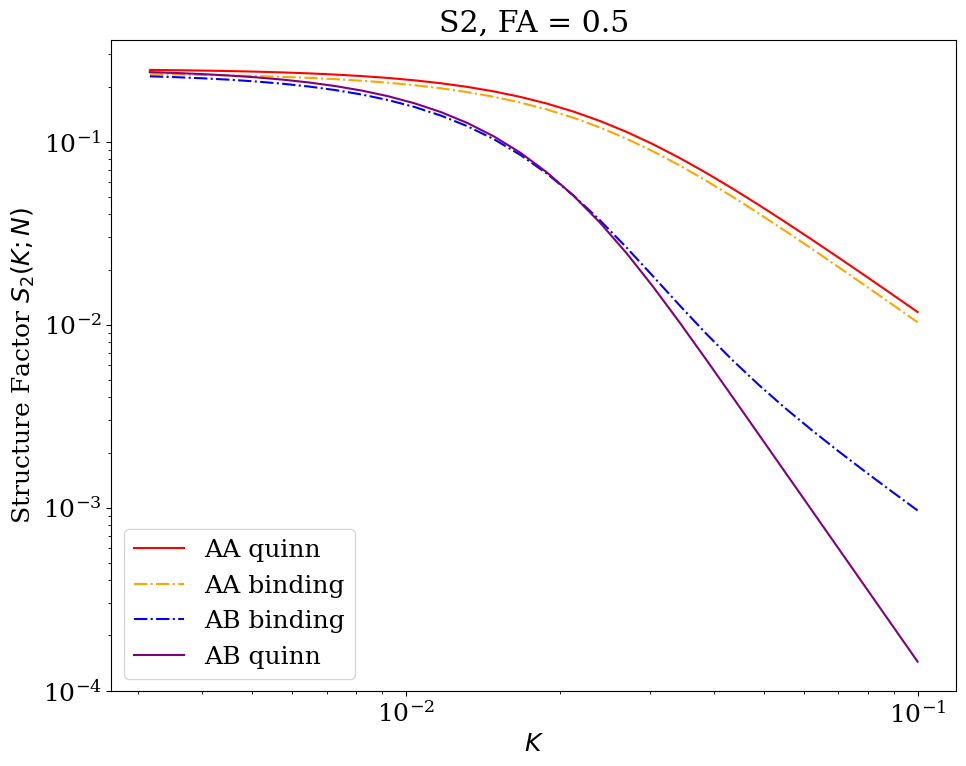

In [46]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2AA_stat, label = "wlcstat")
# plt.plot(k_vec, s2AA_gaus/N**2, label = "gaus", linestyle = "--")
plt.plot(k_vec, s2_vert/N**2, label = "AA quinn", linestyle = "-", color = "red")
plt.plot(k_vec, s2_binder[0]/N**2, label = "AA binding", linestyle = "-.", color = "orange")


plt.plot(k_vec, s2_binder[1]/N**2, label = "AB binding", linestyle = "-.", color = "blue")
plt.plot(k_vec, s2_vert_AB/N**2, label = "AB quinn", linestyle = "-", color = "purple")

plt.xscale('log')
plt.yscale('log')

plt.title("S2, FA = %s" % (FA, ) )
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()

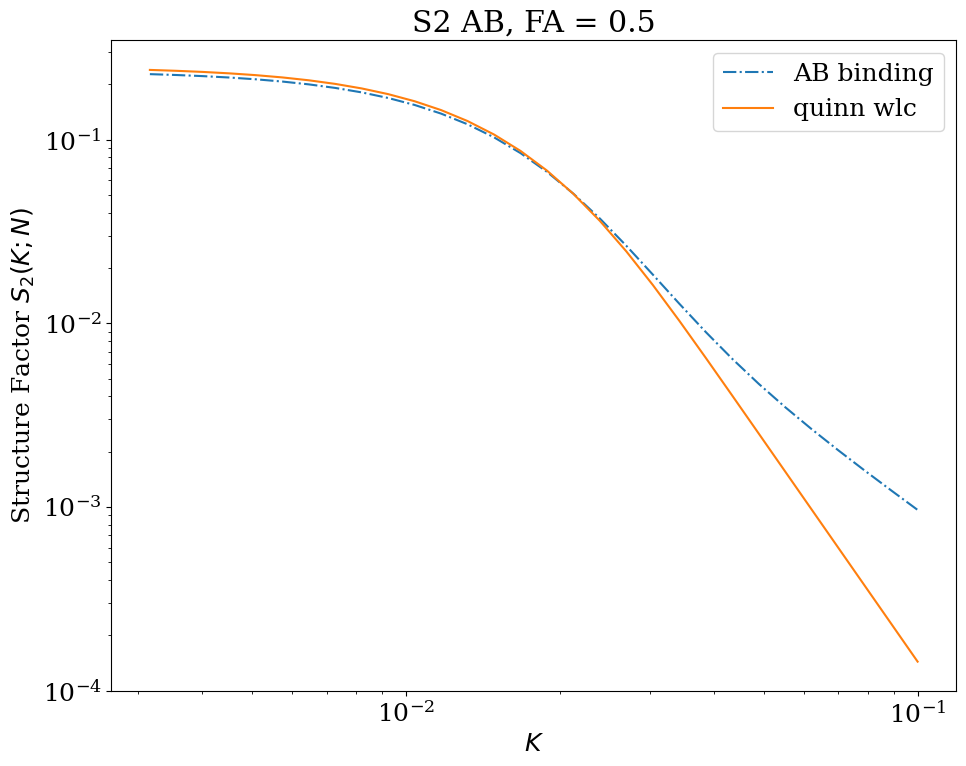

In [40]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.xscale('log')
plt.yscale('log')


plt.plot(k_vec, s2_binder[1]/N**2, label = "AB binding", linestyle = "-.")
plt.plot(k_vec, s2_vert_AB/N**2, label = "quinn wlc", linestyle = "-")


plt.title("S2 AB, FA = %s" % (FA, ) )
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()


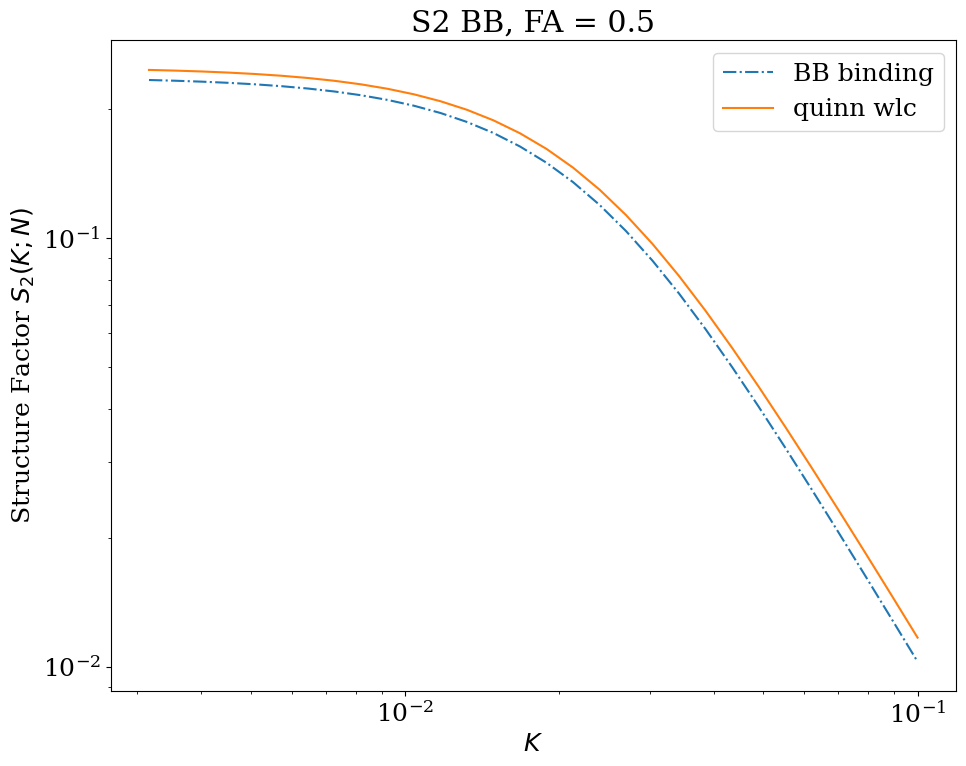

In [38]:

plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.xscale('log')
plt.yscale('log')


plt.plot(k_vec, s2_binder[3]/N**2, label = "BB binding", linestyle = "-.")
plt.plot(k_vec, s2_vert_BB/N**2, label = "quinn wlc", linestyle = "-")


plt.title("S2 BB, FA = %s" % (FA, ) )
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()


# unbound

In [4]:
# import binder_diblock_gamma234_vertex as bd
import PABS_correct_reduc as PABS
import unbound_poly_vertex as PABUS
import final_binder_diblock_vertex as fbd
import homo_mike as hm

In [6]:
# # ID = 9987.64006
# ID = 9995.64006
# # ID = 9997.64006
# ID = 1000.04
ID = 12346.04
# ID = -13.46
# looping = "full mark dens comp alt f_bind,"

settings = np.load(r"C:\Users\tmhab\wlcsim_membrane\binder_diblock\ID=%s_settings.npy" % (ID), allow_pickle = True)

[chrom, [klog_min, klog_max, klog_num]] = settings

# [n_bind, v_int, Vol_int, e_m, rho_c, rho_s, poly_marks, M, mu_max, mu_min, del_mu, f_om, N, N_m, b] = chrom
[n_bind, v_int, Vol_int, e_m, rho_p, rho_s, poly_marks, M, mu_max, mu_min, del_mu, alpha, N, N_m, b] = chrom

[pa_vec, marks_2] = poly_marks

mu1_array = np.arange(mu_min, mu_max, del_mu)
mu2_array = np.arange(mu_min, mu_max, del_mu)

k_vec = np.logspace(klog_min, klog_max, klog_num) / b
  
s2_mats = np.load(r"C:\Users\tmhab\wlcsim_membrane\binder_diblock\ID=%s_chrom_s2_mats_v_int=[[%s,%s],[%s,%s]],diblock,mu_max=%s.npy"\
                 % (ID, v_int[0,0], v_int[0,1], v_int[1,0], v_int[1,1], mu_max), allow_pickle = True)

s_bind_A_arr = np.load(r"ID=%s_s_bind_A.npy" % ID, allow_pickle=True)
s_bind_B_arr = np.load(r"ID=%s_s_bind_B.npy" % ID, allow_pickle=True)
spacing = int(1 / del_mu)

In [186]:
i = 0
j = 0

mu1 = mu1_array[i]
mu2 = mu2_array[j]

FA = 0.5

In [188]:
mu1

-5.0

In [190]:
# heterogenous binding
s_bnd_A = s_bind_A_arr[i,j,:]
s_bnd_B = s_bind_B_arr[i,j,:]
# s_bnd_A = np.ones(len(s_bind_A_arr[i,j,:]))
# s_bnd_B = np.ones(len(s_bind_A_arr[i,j,:]))

# s_bnd_A = s_bind_1_soln_arr[i,j,:]
# s_bnd_B = s_bind_2_soln_arr[i,j,:]
s_bnd_U = 1 - s_bnd_A - s_bnd_B

cc_red = PABUS.eval_and_reduce_cc(M)

s_cgam0_red = PABUS.eval_and_reduce_cgam(s_bnd_A)

s_cgam1_red = PABUS.eval_and_reduce_cgam(s_bnd_B)

sisj_AA_red = PABUS.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_A, s_bnd_A)

sisj_AB_red = PABUS.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_A, s_bnd_B)

sisj_BA_red = sisj_AB_red

sisj_BB_red = PABUS.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_B, s_bnd_B)

s_cu_red = PABUS.eval_and_reduce_cgam(s_bnd_U)

sisj_UA_red = PABUS.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_U, s_bnd_A)

sisj_UB_red = PABUS.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_U, s_bnd_B)

sisj_UU_red = PABUS.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_U, s_bnd_U)

M2s_U = [sisj_AA_red,sisj_AB_red,sisj_BA_red,sisj_BB_red, s_cgam0_red, s_cgam1_red, cc_red, s_cu_red, sisj_UA_red, sisj_UB_red, sisj_UU_red]
M2s = [sisj_AA_red,sisj_AB_red,sisj_BA_red,sisj_BB_red, s_cgam0_red, s_cgam1_red, cc_red]

s2_binder = fbd.calc_sf2_chromo_shlk(chrom, M2s, k_vec)
s2_PABS = PABS.calc_sf2_chromo_shlk(chrom, M2s, k_vec)
s2_PABUS = PABUS.calc_sf2_chromo_shlk(chrom, M2s_U, k_vec)

In [192]:
sisj_UU_red

array([48.58060809, 95.20800663, 93.26859439, 91.33294994, 89.39772157,
       87.46180887, 85.52488493, 83.58688582, 81.64783525, 79.70778512,
       77.76679578, 75.82492959, 73.88224891, 71.93881551, 69.99469042,
       68.04993393, 66.10460568, 64.15876467, 62.21246934, 60.26577764,
       58.31874711, 56.37143488, 54.42389781, 52.47619248, 50.52837529,
       48.58050253, 46.63263039, 44.68481507, 42.73711282, 40.78957997,
       38.84227306, 36.89524882, 34.94856429, 33.00227684, 31.05644427,
       29.11112484, 27.16637734, 25.22226116, 23.27883635, 21.33616365,
       19.39430454, 17.45332107, 15.5132753 , 13.57422738, 11.63622927,
        9.69930538,  7.76339394,  5.82817295,  3.89255066,  1.95318203])

In [194]:
sisj_UA_red

array([0.35227564, 0.69292985, 0.67790427, 0.66194872, 0.64589001,
       0.62999964, 0.61435824, 0.5989816 , 0.58386389, 0.5689923 ,
       0.55435196, 0.53992749, 0.52570352, 0.51166482, 0.49779635,
       0.48408324, 0.47051081, 0.4570645 , 0.44372991, 0.43049277,
       0.41733891, 0.40425424, 0.39122477, 0.37823657, 0.36527573,
       0.35232842, 0.33938079, 0.32641902, 0.31342928, 0.30039769,
       0.28731037, 0.27415336, 0.26091264, 0.24757411, 0.23412358,
       0.22054673, 0.20682914, 0.19295621, 0.17891322, 0.16468525,
       0.15025725, 0.13561397, 0.1207402 , 0.10562116, 0.09024402,
       0.0746026 , 0.0587116 , 0.0426492 , 0.02668257, 0.01163518])

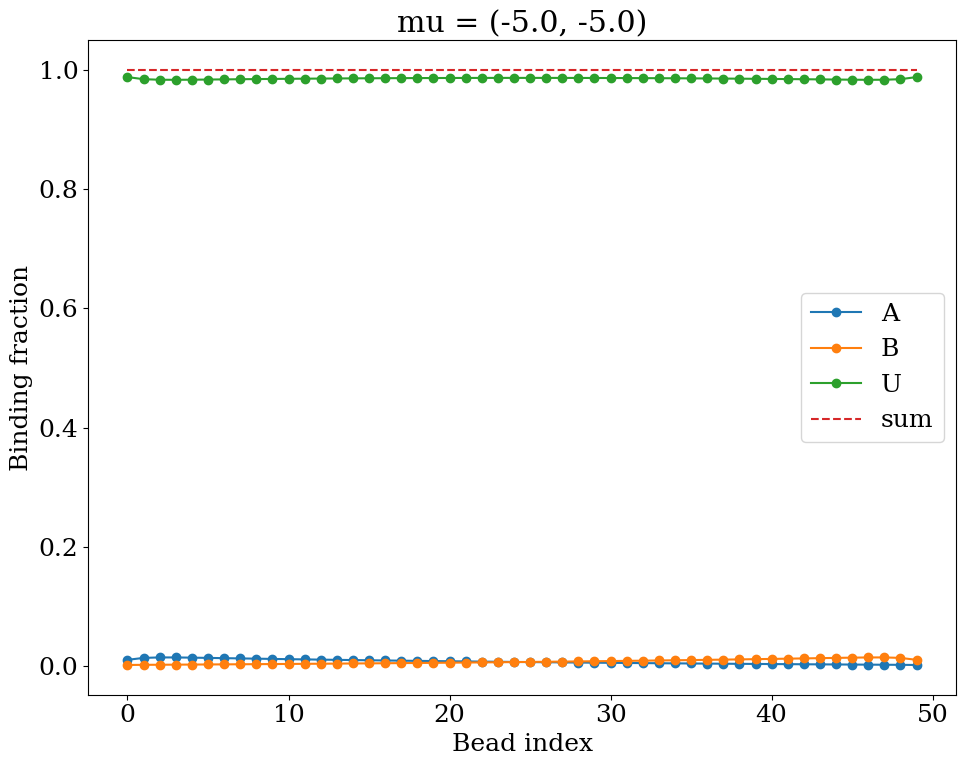

In [196]:
# pa_vec = np.zeros((nm)) + 1
# f_ref = np.min(np.array([j_aa, j_bb, j_ab, ea / 2, eb / 2]))

# phia, phib = eval_phi(pa_vec, mu_a, mu_b, ea, eb, j_aa, j_bb, j_ab, f_ref)

# ea_chk = ea
# eb_chk = 0
# q_chk = 1 + np.exp(mu_a - ea_chk) + np.exp(mu_b - eb_chk)
# phia_chk = np.exp(mu_a - ea_chk) / q_chk
# phib_chk = np.exp(mu_b - eb_chk) / q_chk

plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(s_bnd_A,'o-', label = "A")
plt.plot(s_bnd_B,'o-', label = "B")
plt.plot(s_bnd_U,'o-', label = "U")
plt.plot(s_bnd_A + s_bnd_B + s_bnd_U, '--', label = "sum")

# plt.plot(phib,'o-')
# plt.plot(np.array([0, nm - 1]), np.array([phia_chk, phia_chk]),'--')
# plt.plot(np.array([0, nm - 1]), np.array([phib_chk, phib_chk]),'--')
# plt.plot(pa_vec,'.-')
plt.title("mu = (%s, %s)" % (mu1, mu2)) 
plt.xlabel(r'Bead index')
plt.ylabel(r'Binding fraction')
plt.tight_layout()
plt.legend()
plt.show()

# plt.plot(s_bnd_A)

In [136]:
# s2_binder
# s2_PABS
# s2_PABUS

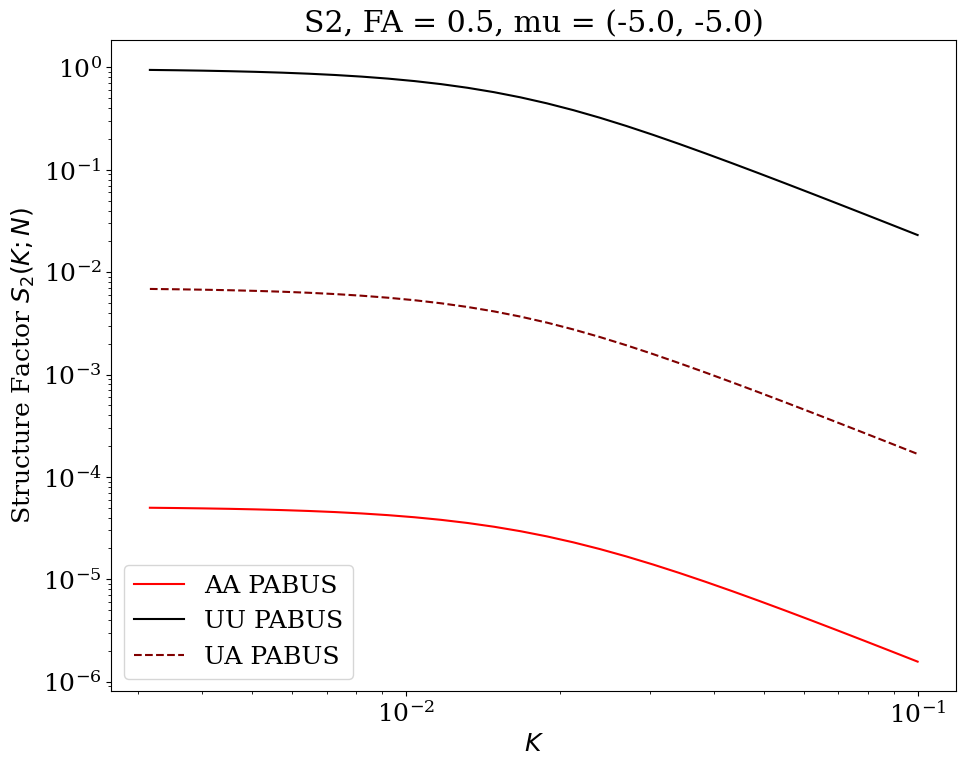

In [198]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# AA verification:
# plt.plot(k_vec, s2_binder[0]/N**2, label = "AA binding", linestyle = "-.", color = "orange")
# plt.plot(k_vec, s2_PABS[0]/N**2, label = "AA PABS", linestyle = "-", color = "yellow")
# plt.plot(k_vec, s2_PABUS[0]/N**2, label = "AA PABUS", linestyle = "--", color = "red")

plt.plot(k_vec, s2_PABUS[0]/N**2, label = "AA PABUS", linestyle = "-", color = "red")
# plt.plot(k_vec, s2_PABUS[0]/N**2, label = "BB PABUS", linestyle = "--", color = "blue")
plt.plot(k_vec, s2_PABUS[-1]/N**2, label = "UU PABUS", linestyle = "-", color = "black")
plt.plot(k_vec, s2_PABUS[-3]/N**2, label = "UA PABUS", linestyle = "--", color = "maroon")
# plt.plot(k_vec, s2_PABUS[-1]/N**2, label = "UB PABUS", linestyle = "--", color = "navy")


# plt.plot(k_vec, s2_PABUS[1]/N**2, label = "AB binding", linestyle = "-.", color = "purple")
# plt.plot(k_vec, s2_vert_AB/N**2, label = "AB quinn", linestyle = "-", color = "purple")

plt.xscale('log')
plt.yscale('log')

plt.title("S2, FA = %s" % (FA, ) + ", mu = (%s, %s)" % (mu1, mu2) )
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
k_vec = np.logspace(klog_min, klog_max, klog_num) / b


In [208]:

# wavevectors
k0 = k_vec[0]
kf = k_vec[-1]
nk = klog_num
# k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

k1_vec = np.zeros((nk, 3))
k2_vec = np.zeros((nk, 3))
k3_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

theta_1 = 2*np.pi/3 #2* np.pi * 1 / 3
theta_2 = 2*np.pi/3

frac = 1
k2_vec[:, 0] += frac * np.cos(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)
k2_vec[:, 1] += frac * np.sin(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)

k3_vec[:, 0] += frac * np.cos(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)
k3_vec[:, 1] += frac * np.sin(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)


k4_vec = - (k1_vec + k2_vec + k3_vec)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

In [238]:
test = np.array([1, 1+5j])
np.sum(np.real(test) == test) / (np.size(test))

0.5

In [248]:
M3 = PABS.calc_mon_mat_3(s_bnd_A, s_bnd_B)

s3_arr = np.zeros((klog_num,4,4,4))
s3_q30_arr = np.zeros((klog_num,4,4,4))

for i in range(klog_num):
    s3_arr[i] = PABS.calc_sf3(chrom, M3, [k1_vec[i]], [k2_vec[i]])#[0,0,0]
    s3_q30_arr[i] = PABS.calc_sf3(chrom, M3, [k1_vec[i]], [-k1_vec[i]])#[0,0,0]

In [250]:
np.sum(np.real(s3_arr) == s3_arr) / (np.size(s3_arr))

1.0

In [252]:
np.sum(np.real(s3_q30_arr) == s3_q30_arr) / (np.size(s3_q30_arr))

1.0

In [ ]:

plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)


plt.plot(k_vec[:], s3_arr_vert[:]/N**3, label = "AAA wlc", linestyle = "-")

plt.plot(k_vec[:], s3_arr_gaus/N**3, label = "AAA gaus", linestyle = "--")




plt.xscale('log')
plt.yscale('log')

plt.title("Cylindrical ks, N = " + str(N) + ", $f_A$ = " + str(FA))
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{3}(K;N)$')
# plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()

# verify M2 is correct

In [57]:
sisj_AA_red = bd.eval_and_reduce_sisj_bind_simp(chrom, s_bnd_A, s_bnd_A)


array([[8.41605975e-01, 9.09234339e-01, 9.15017966e-01, ...,
        5.20095408e-05, 1.68657806e-04, 4.90617872e-04],
       [9.09234339e-01, 9.82297070e-01, 9.88545448e-01, ...,
        5.61888365e-05, 1.82210527e-04, 5.30042122e-04],
       [9.15017966e-01, 9.88545448e-01, 9.94833572e-01, ...,
        5.65462529e-05, 1.83369566e-04, 5.33413713e-04],
       ...,
       [5.20095408e-05, 5.61888365e-05, 5.65462529e-05, ...,
        3.21408405e-09, 1.04227100e-08, 3.03191886e-08],
       [1.68657806e-04, 1.82210527e-04, 1.83369566e-04, ...,
        1.04227100e-08, 3.37990179e-08, 9.83198031e-08],
       [4.90617872e-04, 5.30042122e-04, 5.33413713e-04, ...,
        3.03191886e-08, 9.83198031e-08, 2.86007828e-07]])

In [61]:
def calc_sf2_2Dmonmat(chrom, M2_AA, k_vec = np.logspace(-3, -1, 30)):
    print("ONLY VALID FOR M2_AA!!!")
    # M2_AA = calc_monomer_matrix(poly_mat, dens)
    M = np.shape(M2_AA)[0]
    nk = len(k_vec)
    N = M*N_m

    grid = np.indices((M, M))
    j1 = grid[0]
    j2 = grid[1]
    
    S2_AA_arr = np.zeros(nk)
    S2_AB_arr = np.zeros(nk)
    S2_BA_arr = np.zeros(nk)
    S2_BB_arr = np.zeros(nk)
    
    M2_AB = M2_AA[j1, j1] - M2_AA
    M2_BA = M2_AA[j2, j2] - M2_AA
    M2_BB = 1 - M2_AA[j1, j1] - M2_AA[j2, j2] + M2_AA[j1, j2]
    
    for i, k in enumerate(k_vec):
        C = np.zeros((M, M))
        k = np.linalg.norm(k)
        x_m = (1/6) * N_m * b**2 * k**2

        #j1 = j2, s1 > s2
        index = (j1 == j2)
        constant = 1
        debye = (2/(x_m**2)) * (x_m + np.exp(-x_m) - 1) 
        
        C[np.where((index) != 0)] += debye
        
        #j1 > j2, s1 s2 any
        index = (j1 > j2)
        constant = np.exp(-x_m*(j1-j2))
        integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) #for off-diagonal terms

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral
        
        #j2 > j1, s1 s2 any
        index = (j2 > j1)
        constant = np.exp(-x_m*(j2-j1))
#         integral is the same

        C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral   
#         print(C/M**2)
        S2_AA_arr[i] = np.sum((1/M**2) * C * M2_AA)
        S2_AB_arr[i] = np.sum((1/M**2) * C * M2_AB)
        S2_BA_arr[i] = np.sum((1/M**2) * C * M2_BA)
        S2_BB_arr[i] = np.sum((1/M**2) * C * M2_BB)
    return S2_AA_arr*N**2, S2_AB_arr*N**2*0, S2_BA_arr*N**2*0, S2_BB_arr*N**2*0


In [65]:
M2_AA_2d = np.einsum('i,j',s_bnd_A,s_bnd_A)
sf2_2d = calc_sf2_2Dmonmat(chrom, M2_AA_2d, k_vec) 


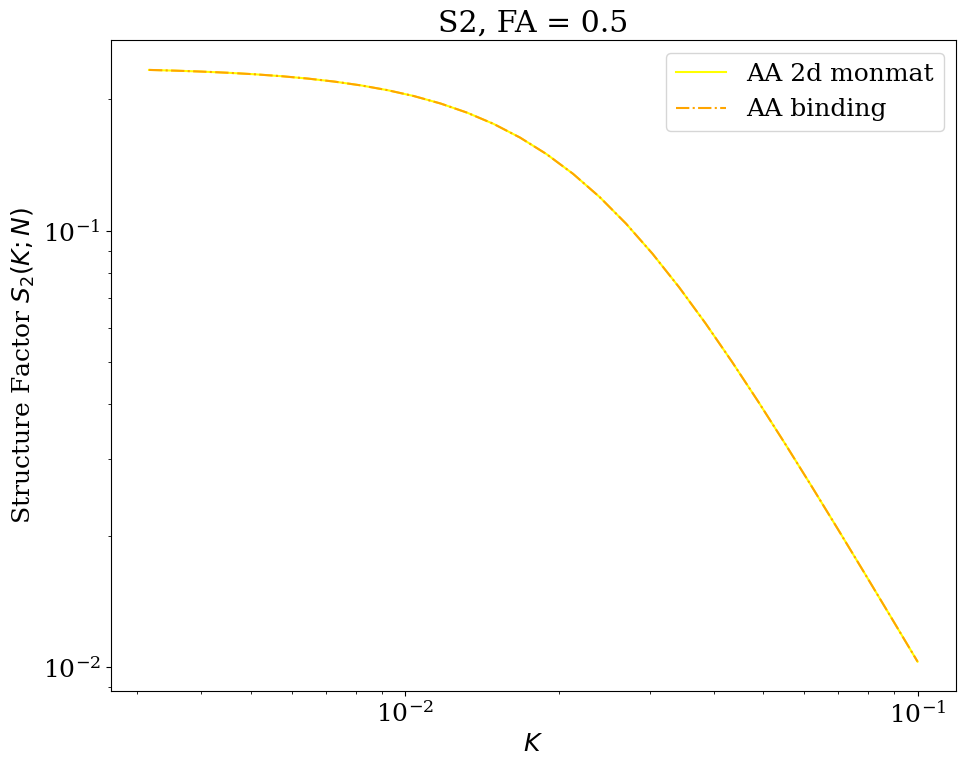

In [71]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec, s2_vert/N**2, label = "AA quinn", linestyle = "-", color = "red")
plt.plot(k_vec, sf2_2d[0]/N**2, label = "AA 2d monmat", linestyle = "-", color = "yellow")
plt.plot(k_vec, s2_binder[0]/N**2, label = "AA binding", linestyle = "-.", color = "orange")


# plt.plot(k_vec, s2_binder[1]/N**2, label = "AB binding", linestyle = "-.", color = "blue")
# plt.plot(k_vec, s2_vert_AB/N**2, label = "AB quinn", linestyle = "-", color = "purple")

plt.xscale('log')
plt.yscale('log')

plt.title("S2, FA = %s" % (FA, ) )
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
# plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()